-----------------------------------------
organic
-----------------------------------------


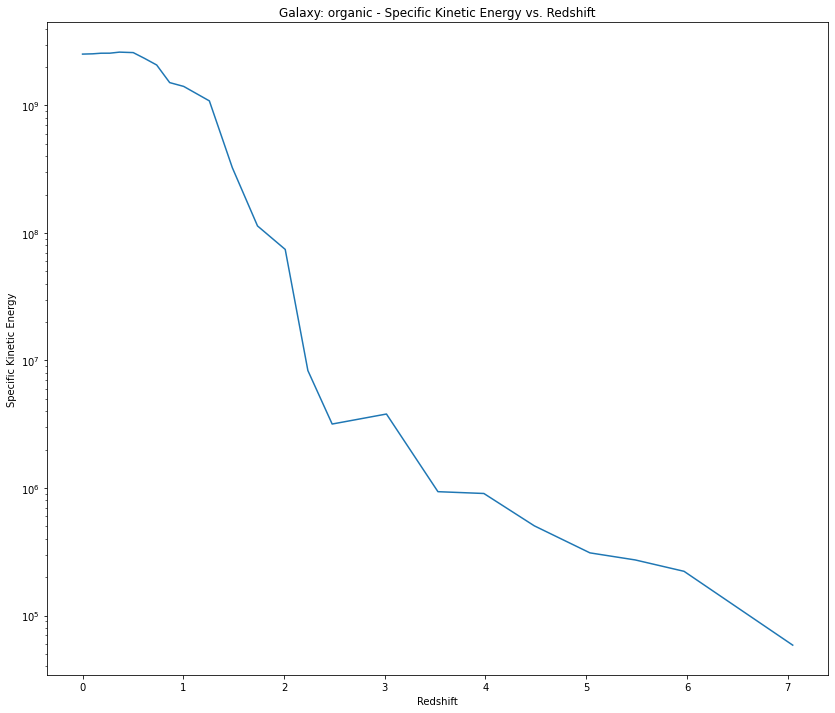

-----------------------------------------
gm_late
-----------------------------------------


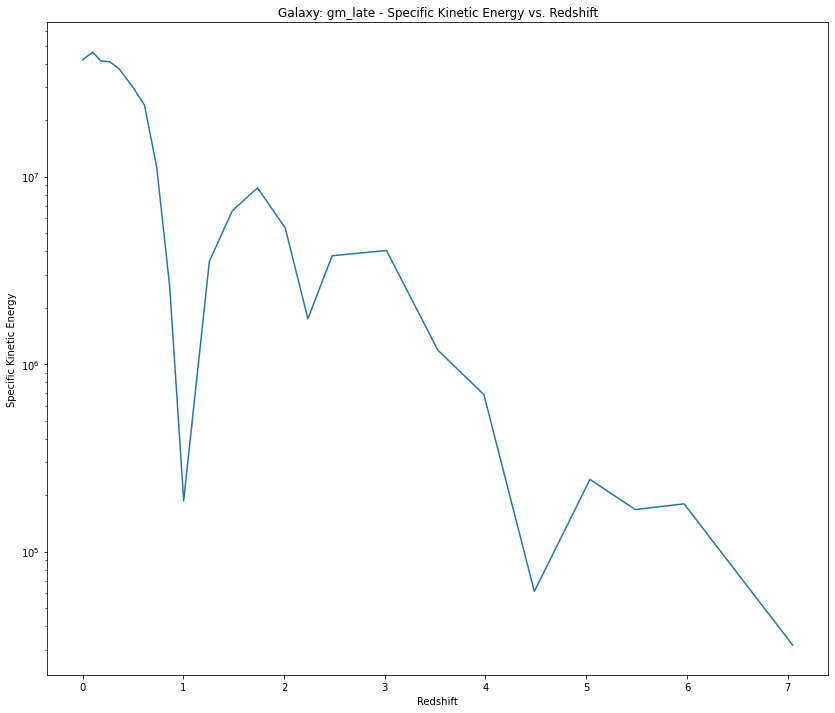

-----------------------------------------
gm_early
-----------------------------------------


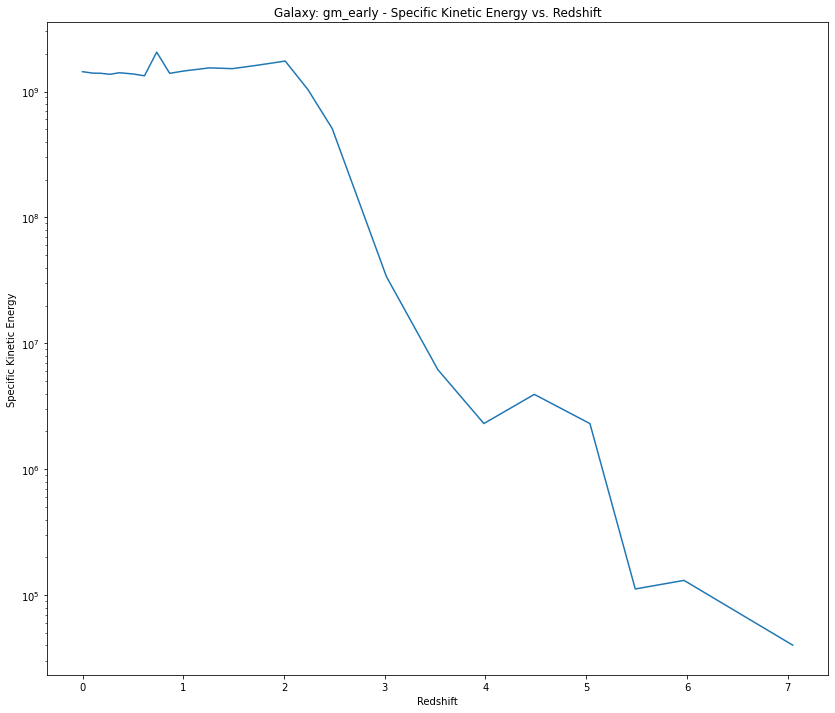

In [9]:
import h5py
import matplotlib.pyplot as plt
import os
from os import listdir
from mpl_toolkits import mplot3d
import matplotlib.gridspec as gridspec
import numpy as np
import re
import pandas as pd

datasets = ['organic', 'gm_late', 'gm_early']

for dataset in datasets:
    print('-----------------------------------------')
    print(dataset)
    print('-----------------------------------------')
    
    files = listdir('C:\\Users\\katha\\GalaxyMorphology\\' + dataset)
    os.path.join("/C:", "Users","katha","GalaxyMorphology", dataset)

    count = 0

    redshift = np.array(range(24), dtype = float)
    EKin = np.array(range(24), dtype = float)
    SpecEKin = np.array(range(24) , dtype = float)
    

  
    for file in files:
    #if 1==1:



        #file = 'star_particles_015_z002p012.hdf5'
        #file = 'star_particles_028_z000p000.hdf5'
        
        # get redshift from the filename
        m = re.search('(z[0-9])\w+', file)
        s = m.group(0).replace('z', '')
        s = s.replace('p', '.')
        redshift[count] = float(s)
    
        
        # load data for a particular galaxy at a particular redshift
        f = h5py.File('C:\\Users\\katha\\GalaxyMorphology\\' + dataset + '/' + file,'r')

        # extract data from the file
        ds_c = f['Coordinates']
        ds_v = f['Velocity']                    
        ds_m = f['Mass']
              
        # Calculate the maginitude of the velocity vector
        import numpy as np
        #vel = np.array(ds_v[0:1])
        vel = np.linalg.norm(ds_v, axis=1)
        #print(vel)
             
        
        # calculate Ekin
        EKin[count] = np.sum((0.5)*(np.array(ds_m))*((vel)**2))
        #print(ds_m)
        
        # calculate Ekin
        SpecEKin[count] =np.sum((0.5)*((vel)**2))
        #print(ds_m)

                     
        count = count + 1
        

    #for n in range(24):
            #print('file name:   '+ file   +  '\t redshift:   ' + str(galaxyAm[n][0]) + '\t mass: ' + str(galaxyAm2[n][0]) + '\t ds_v: ' + str(galaxyAm5[n][0]) +   '\t mag of velocity vector: ' + str(galaxyAm3[n][0]) + '\t Kinetic energy: ' + str(galaxyAm4[n][0]))
           
    plt.plot(redshift, SpecEKin)
    plt.title('Galaxy: ' + dataset + ' - Specific Kinetic Energy vs. Redshift')
    plt.xlabel('Redshift')
    plt.ylabel('Specific Kinetic Energy')
    plt.ticklabel_format(axis='y', style='sci', useMathText=True)
    plt.rcParams["figure.figsize"] = (14,12)
    plt.semilogy()
    plt.show()
    
    

           
      